# Boston Hubway Analysis 

Hubway Data set is Boston's public bike share program. With 1600 bikes and 180 stations across Boston, Cambridge, and Somerville.Every time a hubway user checks a bike out from the station, a system records basic about the user and the trip.

The dataset contains data for the the month of January, February and March of year 2018, with data points:

    -Trip Duration - Duration of trip.           
    -Start Time - Includes start date and time.                
    -Stop Time - Includes end date and time.                   
    -Start station id - Includes start station ID  
    -Start station name - Includes start station Name
    -Start station latitude - Includes start station latitude
    -Start station longitude - Includes start station longitude
    -End station id - Includes end station ID
    -End station name- Includes end station Name
    -End station latitude- Includes end station latitude
    -End station longitude - Includes end station longitude
    -Bikeid -  Includes ID number of bike used for the trip. 
    -Usertype - Includes usertype as "Customer" and "Subscriber".
    -Birth year - Lists the year in which user were born.
    -Gender - Lists gender for user.  
    
Some of the questions I intend to answer are:

    -Which are the more popular hubway stations
    -Which are the more popular hubway bikes
    -Number of users with respect to gender and user type
    -Which was the most popular week in the month of January 2015
    -Forecast the future user types with respect to trip duration and location of start station and end station

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
import statsmodels.api as smf
from sklearn.cross_validation import train_test_split

%matplotlib inline

C:\Users\monis\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
tripsjan = pd.read_csv("https://s3.amazonaws.com/hubway-data/201801-hubway-tripdata.zip")
tripsfeb = pd.read_csv("https://s3.amazonaws.com/hubway-data/201802-hubway-tripdata.zip")
tripsmarch = pd.read_csv('https://s3.amazonaws.com/hubway-data/201803-hubway-tripdata.zip')
station = pd.read_csv('https://s3.amazonaws.com/hubway-data/Hubway_Stations_as_of_July_2017.csv')
trip = tripsjan.append(tripsfeb).append(tripsmarch)
print(trip.describe())

       tripduration  start station id  start station latitude  \
count  1.667340e+05     166734.000000           166734.000000   
mean   9.176721e+02         90.951678               42.359010   
std    1.189217e+04         58.941039                0.014168   
min    6.100000e+01          1.000000               42.303469   
25%    3.540000e+02         42.000000               42.350406   
50%    5.620000e+02         80.000000               42.359912   
75%    9.140000e+02        133.000000               42.366277   
max    2.440760e+06        232.000000               42.400877   

       start station longitude  end station id  end station latitude  \
count            166734.000000   166734.000000         166734.000000   
mean                -71.087817       90.000642             42.358812   
std                   0.024572       59.105363              0.104676   
min                 -71.166491        1.000000              0.000000   
25%                 -71.104412       40.000000        

In [4]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166734 entries, 0 to 62984
Data columns (total 15 columns):
tripduration               166734 non-null int64
starttime                  166734 non-null object
stoptime                   166734 non-null object
start station id           166734 non-null int64
start station name         166734 non-null object
start station latitude     166734 non-null float64
start station longitude    166734 non-null float64
end station id             166734 non-null int64
end station name           166734 non-null object
end station latitude       166734 non-null float64
end station longitude      166734 non-null float64
bikeid                     166734 non-null int64
usertype                   166734 non-null object
birth year                 157142 non-null float64
gender                     166734 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 20.4+ MB


In [5]:
# We can see that there are many missing values in the 'birth year' column. 
# Missing values can be filled by replacing it with the mean value
trip['birth year'] = trip['birth year'].fillna((trip['birth year'].mean())) 

count    1.667340e+05
mean     9.176721e+02
std      1.189217e+04
min      6.100000e+01
25%      3.540000e+02
50%      5.620000e+02
75%      9.140000e+02
max      2.440760e+06
Name: tripduration, dtype: float64


Text(0.5,0,'Trip Duration')

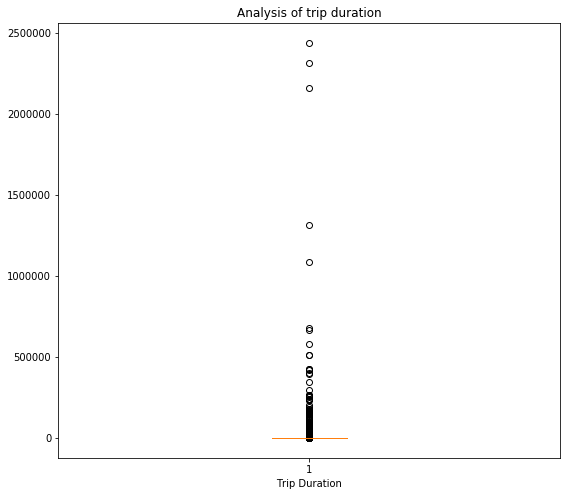

In [6]:
print(trip['tripduration'].describe())
plt.figure(figsize=(9, 8))
plt.boxplot(trip['tripduration'])
plt.title("Analysis of trip duration")
plt.xlabel("Trip Duration")

From the boxplot we can see that the trip duration for 99% of the customers is around 100. There are many outliers.

Text(0.5,1,'Density plot of birth year')

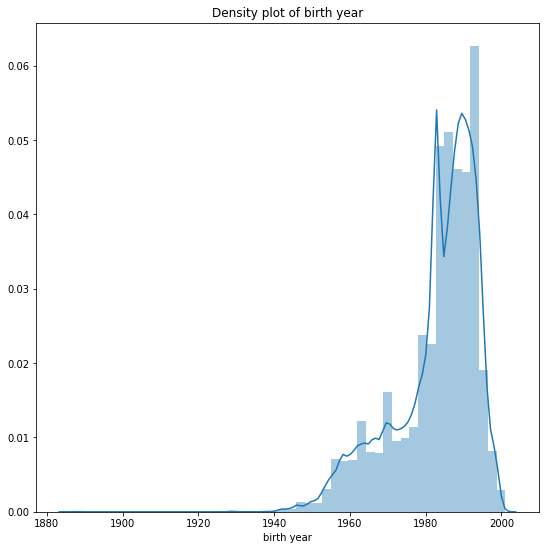

In [7]:
plt.figure(figsize = (9,9))
sns.distplot(trip['birth year'])
plt.title("Density plot of birth year")

We can clearly see that most bikers are born between 1985 to 1990. Therefore the age group in which hubway bikes are popular are 28-33 years.

0    67
dtype: int64
Most number of bikes are checked out from MIT at Mass Ave / Amherst St


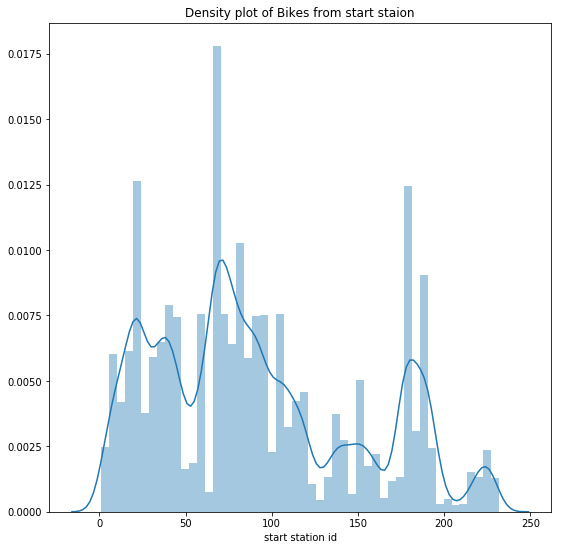

In [8]:
plt.figure(figsize = (9,9))
sns.distplot(trip['start station id'])
plt.title("Density plot of Bikes from start staion")
print(trip['start station id'].mode())
print('Most number of bikes are checked out from',trip['start station name'][trip['start station id'] == 67][0])


Text(0.5,1,'Density plot of Bikes from start staion')

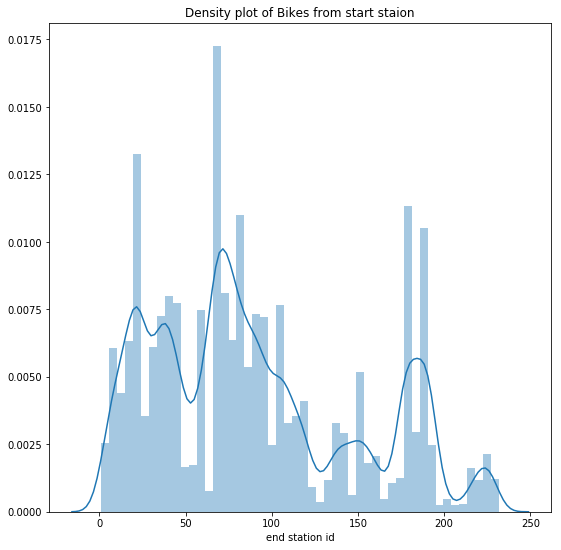

In [9]:
plt.figure(figsize = (9,9))
sns.distplot(trip['end station id'])
plt.title("Density plot of Bikes from start staion")

Both density graph for start station and end station, shows the same pattern. Meaning both incomming and out going traffic from the hubway station are very similar.

In [10]:
print('Number of trips in January', tripsjan['tripduration'].count())
print('Number of trips in February',tripsfeb['tripduration'].count())
print('Number of trips in March',tripsmarch['tripduration'].count())


Number of trips in January 40932
Number of trips in February 62817
Number of trips in March 62985


We can see that Number of users using Bikes in the Month of January is way less than that in February and March. This is possibly because of the winter in Boston.

Text(0.5,1,'Station ID with Average trip duration')

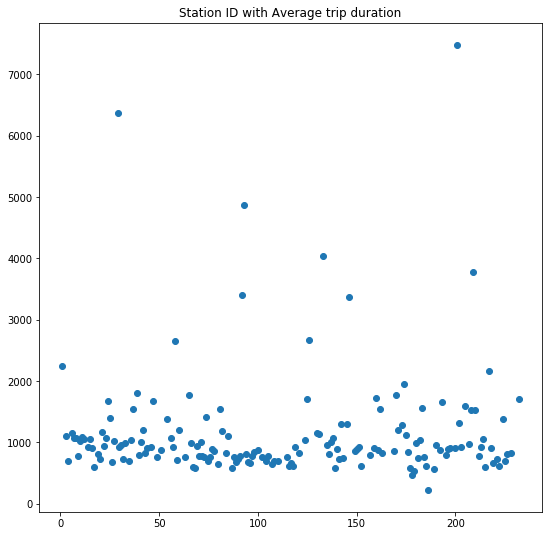

In [11]:
x = trip.groupby(['start station id'])['tripduration'].mean()
plt.figure(figsize = (9,9))
plt.scatter(x = x.index, y = x)
plt.title("Station ID with Average trip duration")

While majority of station has an average trip duration within 2000, there are few which exceeds this number and goes upto 7000+. Maintainence on these station should be done regularly as more distance is covered by bikes from this station.

Text(37.9875,0.5,'Trip Duration')

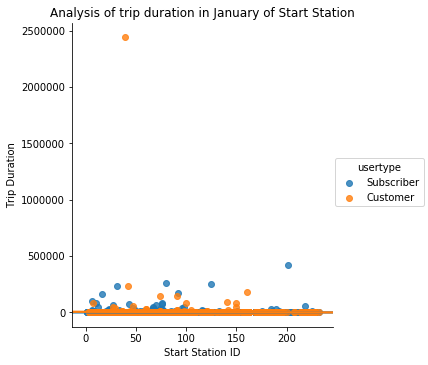

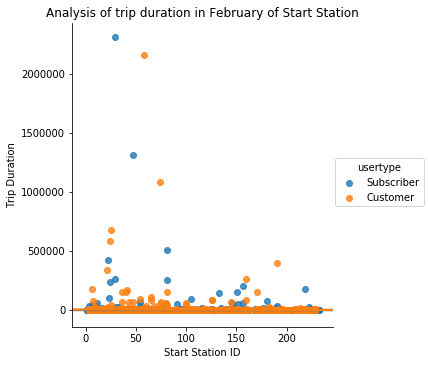

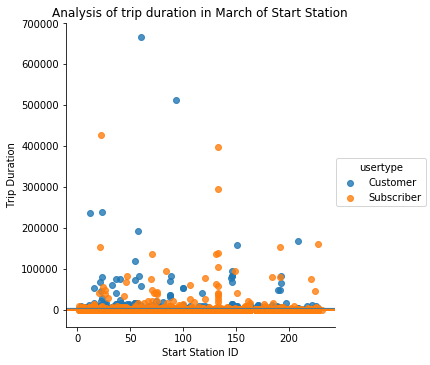

In [12]:
sns.lmplot(x ='start station id', y ='tripduration', data = tripsjan, hue = 'usertype')
plt.title("Analysis of trip duration in January of Start Station")
plt.xlabel("Start Station ID")
plt.ylabel("Trip Duration")

sns.lmplot(x ='start station id', y ='tripduration', data = tripsfeb, hue = 'usertype')
plt.title("Analysis of trip duration in February of Start Station")
plt.xlabel("Start Station ID")
plt.ylabel("Trip Duration")

sns.lmplot(x ='start station id', y ='tripduration', data = tripsmarch, hue = 'usertype')
plt.title("Analysis of trip duration in March of Start Station")
plt.xlabel("Start Station ID")
plt.ylabel("Trip Duration")


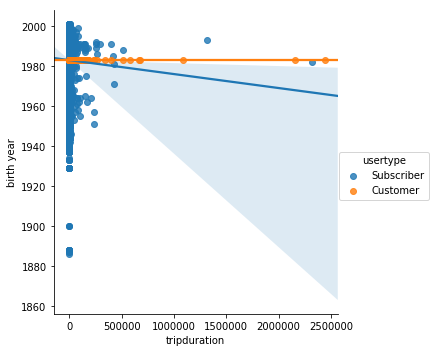

In [16]:
sns.lmplot(x = 'tripduration', y = 'birth year', data = trip, hue = 'usertype')
#Customers are users with 24-Hour or 72-Hour Pass, while subscriber are with monthly or annual pass
#The trip duration given is in seconds
# Number of subscribers if way more than customers
#Customers are more likly to ride the bike for more timeduration compared to Subscribers

To conclude we can say that the bikes are mostly used by the population with the age group of 28 - 33.
The most popular station where bikes are checkedout and checked in is station id 67, which belongs to MIT at Mass Ave / Amherst St.
Number of subscribers are more than customers.
There are 10 stations where bikes are used for trip duration of more than 2000